In [2]:
import numpy as np
import cv2
import imutils
from matplotlib import pyplot as plt
import os,sys,time
%matplotlib inline

In [5]:
#https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
%load_ext autoreload

In [6]:
%autoreload 2

In [22]:
from imports.Vid import MyVid

In [14]:
MyVid.myfunc()

43

In [23]:
MyVid.procFrame(1)

True

In [24]:
path = "output4.avi"
cap = cv2.VideoCapture(path)
frames=[]

while(cap.isOpened()):

    ret,frame = cap.read()
    
    frames.append(frame)
    
    if not(ret):
        break
        
cap.release()

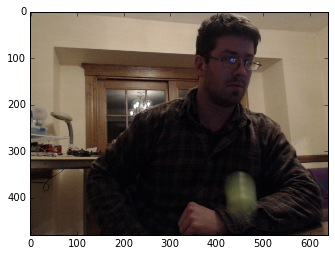

In [34]:
i  =59
plt.imshow(imutils.opencv2matplotlib(  frames[i]  ))

In [35]:
frame = frames[i]
frame = imutils.resize(frame, width=600)
blurred = cv2.GaussianBlur(frame, (11, 11), 0)
hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

In [42]:
def pp(img):
    plt.imshow(imutils.opencv2matplotlib(img))
    plt.show()
    return 1

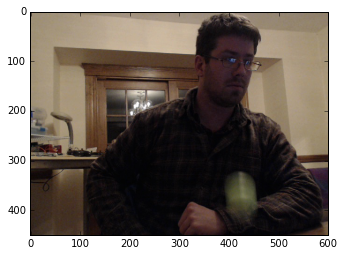

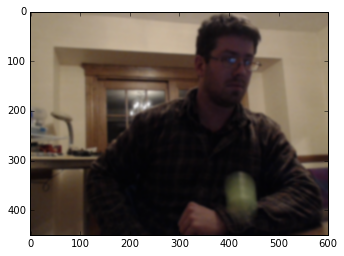

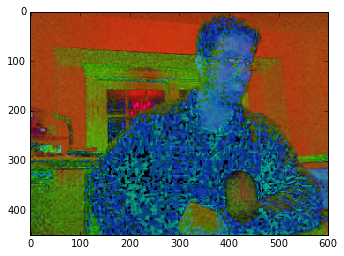

1

In [44]:
pp(frame)
pp(blurred)
pp(hsv)


0   0   0


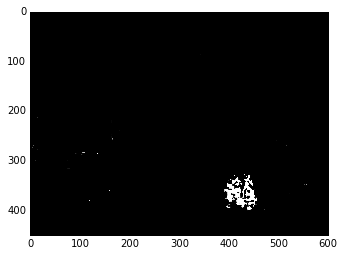

0   0   10


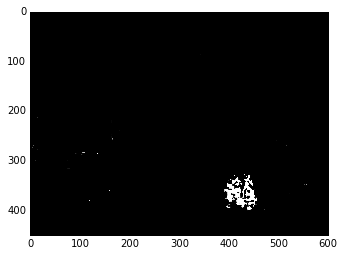

0   0   -10


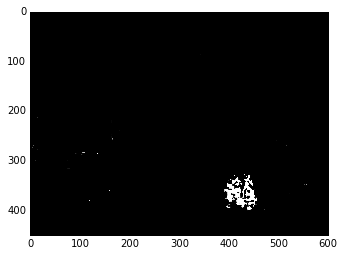

0   10   0


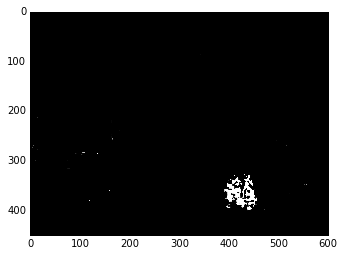

0   10   10


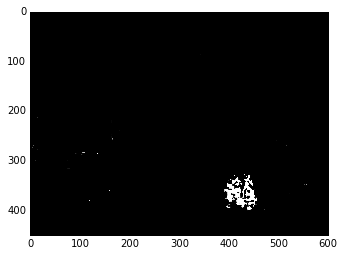

0   10   -10


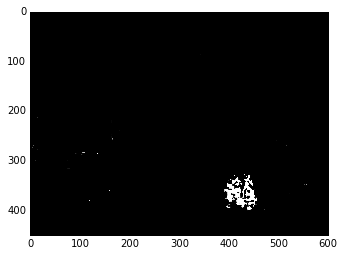

0   -10   0


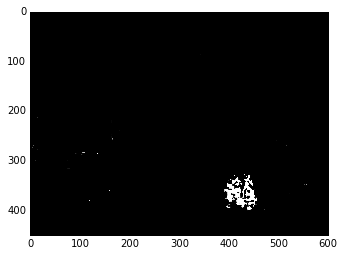

0   -10   10


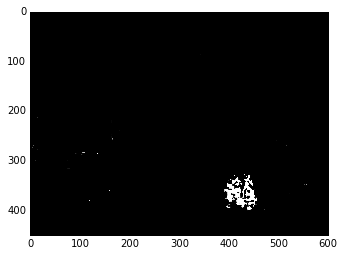

0   -10   -10


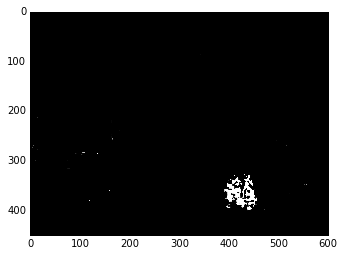

10   0   0


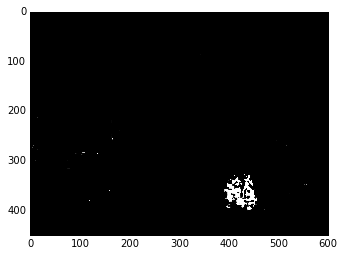

10   0   10


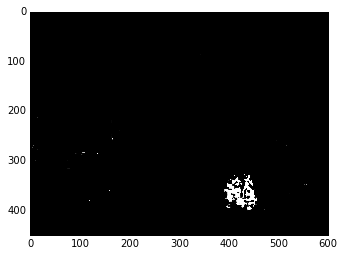

10   0   -10


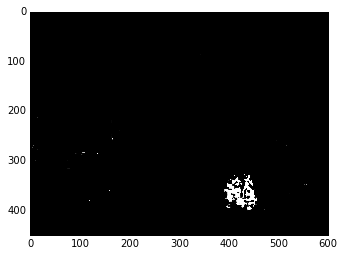

10   10   0


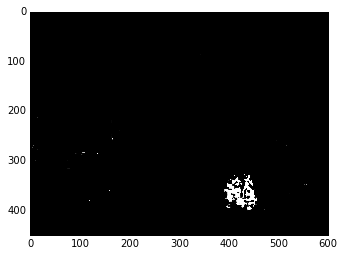

10   10   10


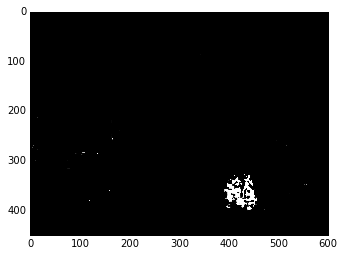

10   10   -10


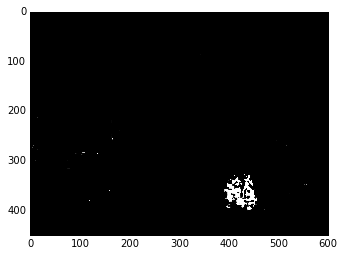

10   -10   0


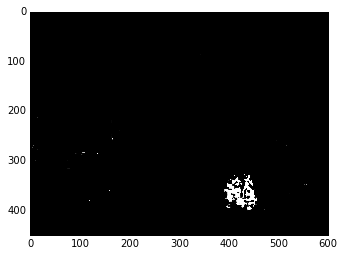

10   -10   10


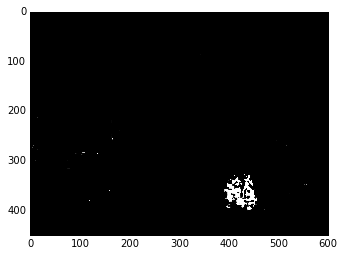

10   -10   -10


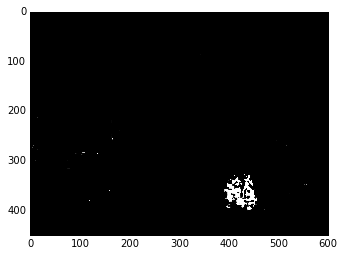

-10   0   0


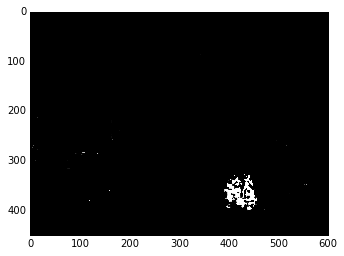

-10   0   10


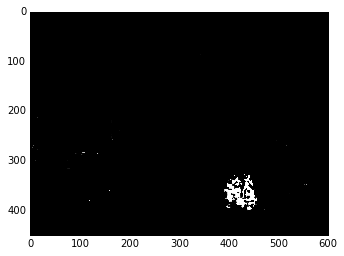

-10   0   -10


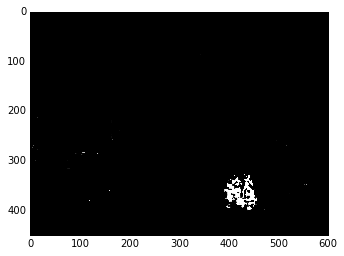

-10   10   0


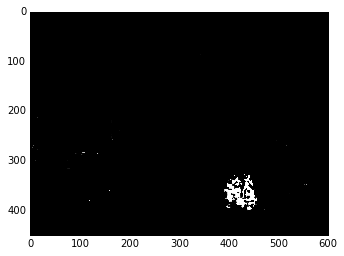

-10   10   10


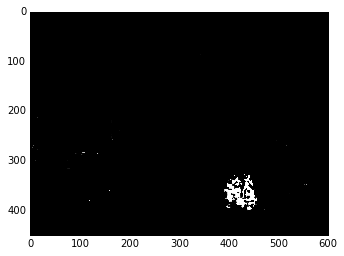

-10   10   -10


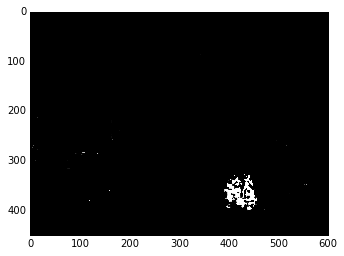

-10   -10   0


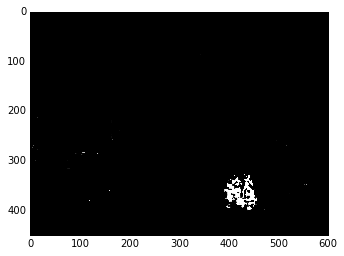

-10   -10   10


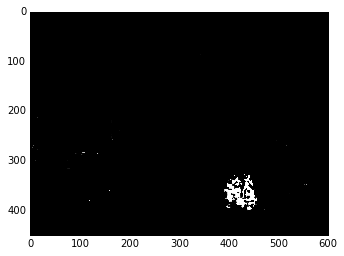

-10   -10   -10


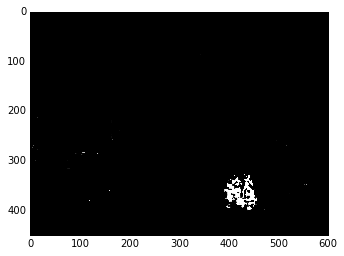

In [76]:
rr = [0,10,-10]
for a in rr:
    for b in rr:
        for c in rr:

            greenLower = (29 + 0, 86 - 10, 6 + 10)
            greenUpper = (64 + a, 255 + b, 255 + c)

            mask = cv2.inRange(hsv, greenLower, greenUpper)
            print str(a), " ", str(b), " ", str(c)
            plt.imshow(mask,cmap='gray')
            plt.show()

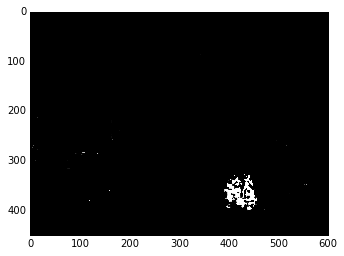

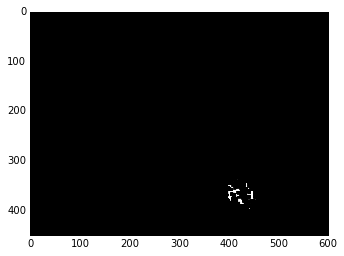

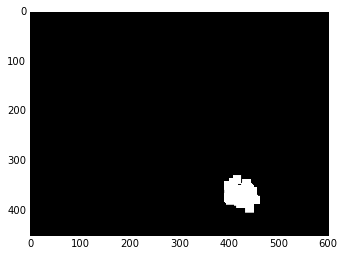

In [77]:
greenLower = (29, 86, 6)
greenUpper = (64, 255, 255)

#mask = cv2.inRange(hsv, greenLower, greenUpper)
plt.imshow(mask,cmap='gray')
plt.show()
mask = cv2.erode(mask, None, iterations=2)
plt.imshow(mask,cmap='gray')
plt.show()
mask = cv2.dilate(mask, None, iterations=8)
plt.imshow(mask,cmap='gray')
plt.show()

In [69]:
cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE)[-2]
center = None

In [70]:
cnts

[array([[[439, 364]],
 
        [[439, 380]],
 
        [[455, 380]],
 
        [[455, 364]]]), array([[[426, 338]],
 
        [[426, 349]],
 
        [[425, 350]],
 
        [[411, 350]],
 
        [[410, 349]],
 
        [[410, 343]],
 
        [[393, 343]],
 
        [[393, 353]],
 
        [[392, 354]],
 
        [[390, 354]],
 
        [[390, 374]],
 
        [[391, 375]],
 
        [[391, 383]],
 
        [[408, 383]],
 
        [[409, 384]],
 
        [[409, 390]],
 
        [[415, 390]],
 
        [[416, 391]],
 
        [[416, 395]],
 
        [[434, 395]],
 
        [[435, 394]],
 
        [[436, 394]],
 
        [[436, 378]],
 
        [[435, 378]],
 
        [[434, 377]],
 
        [[433, 377]],
 
        [[432, 376]],
 
        [[432, 372]],
 
        [[431, 372]],
 
        [[429, 370]],
 
        [[423, 370]],
 
        [[422, 369]],
 
        [[423, 368]],
 
        [[427, 368]],
 
        [[427, 357]],
 
        [[428, 356]],
 
        [[442, 356]],
 
        [[442, 33

In [71]:
if len(cnts) > 0:
		# find the largest contour in the mask, then use
		# it to compute the minimum enclosing circle and
		# centroid
		c = max(cnts, key=cv2.contourArea)
		((x, y), radius) = cv2.minEnclosingCircle(c)
		M = cv2.moments(c)
		center = (int(M["m10"] / M["m00"]), int(M["m01"] / M["m00"]))

		# only proceed if the radius meets a minimum size
		if radius > 10:
			# draw the circle and centroid on the frame,
			# then update the list of tracked points
			cv2.circle(frame, (int(x), int(y)), int(radius),
				(0, 255, 255), 2)
			cv2.circle(frame, center, 5, (0, 0, 255), -1)

In [83]:
xyr_list = map(lambda c: cv2.minEnclosingCircle(c), cnts)
xyr_list

[((447.0, 372.0), 11.31380844116211),
 ((419.51043701171875, 363.9118347167969), 34.31050109863281)]

In [84]:
def xx(xyr):
    x,y,r = xyr[0][0],xyr[0][1],xyr[1]
    cv2.circle(frame, (int(x), int(y)), int(radius), (0, 255, 255), 2)
    cv2.circle(frame, center, 5, (0, 0, 255), -1)
    return 1
map(xx,xyr_list)

[1, 1]

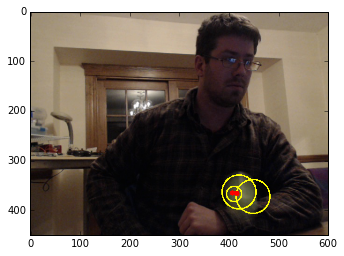

1

In [85]:
pp(frame)

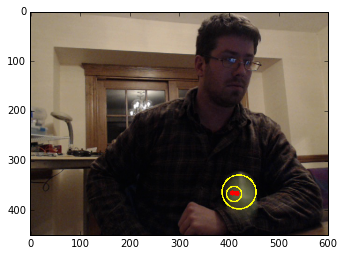

1

In [87]:
pp(frameold)

In [59]:
radius

15.305328369140625

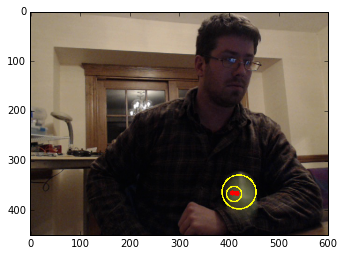

1

In [72]:
pp(frame)

In [78]:
frameold = frame.copy()